In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

perceptron(
  (fc): Linear(in_features=2, out_features=1, bias=True)
)
Initial weights:  Parameter containing:
tensor([[-1.4719, -0.7703]], requires_grad=True)
Initial bias:  Parameter containing:
tensor([0.5363], requires_grad=True)
Epoch: 0, Loss: 2.6357064247131348
Epoch: 100, Loss: 0.26440924406051636
Epoch: 200, Loss: 0.1355787068605423
Epoch: 300, Loss: 0.08960162103176117
Epoch: 400, Loss: 0.06664727628231049
Epoch: 500, Loss: 0.05299306660890579
Epoch: 600, Loss: 0.04396600276231766
Epoch: 700, Loss: 0.037563420832157135
Epoch: 800, Loss: 0.0327891930937767
Epoch: 900, Loss: 0.02909349836409092


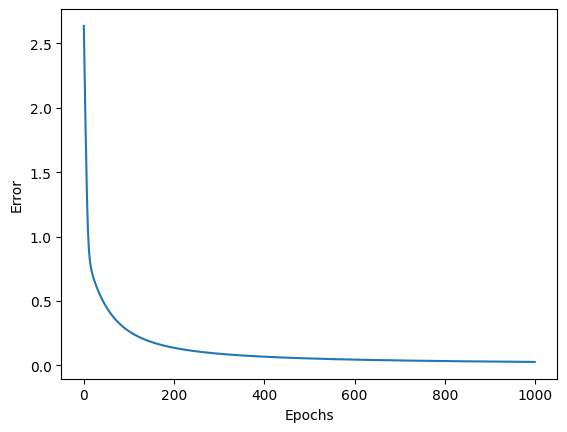

Testing the model:
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])
Inputs (X):
tensor([[0.0000, 0.0000],
        [0.0000, 1.0000],
        [1.0000, 0.0000],
        [3.0000, 3.0000],
        [2.5000, 2.5000]])

Weights:
tensor([[1.6546, 1.7377]])

Bias:
tensor([-4.7255])

Outputs after training:
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [4]:
# 1. Perceptron with 2 inputs and 1 output

# Seed for reproducibility
torch.manual_seed(0)

# Generate Input Data
X = torch.tensor([[0, 0], [0, 1], [1, 0], [3, 3], [2.5, 2.5]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1], [1]], dtype=torch.float32)

# Create a class for the model
class perceptron(nn.Module):
    def __init__(self):
        super(perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)
        # Set initial weights and bias randomly between -2 and 2
        self.fc.weight.data = torch.empty(1, 2).uniform_(-2, 2)  
        self.fc.bias.data = torch.empty(1).uniform_(-2, 2)  
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))
    
# initialize the model
model = perceptron()
print(model)

# Print initial weights and bias
print("===========================================================")
print("Initial weights: ", model.fc.weight)
print("Initial bias: ", model.fc.bias)
print("===========================================================")

# Loss and optimizer
loss_func = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

# Training loop
error_hist = []

for epoch in range(1000):
    # Forward pass
    y_pred = model(X)

    # Compute loss
    loss = loss_func(y_pred, y)
    error_hist.append(loss.item())

    # Zero gradients, backward pass, update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Plot the error
plt.plot(error_hist)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

print("===========================================================")
# Test the model
print("Testing the model:")
model.eval()
with torch.no_grad():
    y_pred = model(X)

    y_pred = (y_pred > 0.5).float()
    print(y_pred)
    print(y)

# Print the inputs
print("===========================================================")
print("Inputs (X):")
print(X)

# Print the model's weights and bias
print("\nWeights:")
print(model.fc.weight.data)  
print("\nBias:")
print(model.fc.bias.data)  

# Compute and print the outputs after training
outputs = model(X)
print("\nOutputs after training:")
print((outputs > 0.5).float())


Transformed 3D Data (x1, x2, x3):
tensor([[ 1.,  1.,  2.],
        [ 1., -1.,  2.],
        [-1.,  1.,  2.],
        [-1., -1.,  2.],
        [ 5.,  5., 50.],
        [-5.,  5., 50.],
        [ 5., -5., 50.],
        [-5., -5., 50.]])
NeuralNet(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)
Initial weights:  Parameter containing:
tensor([[-0.7703,  0.5363, -0.0396]], requires_grad=True)
Initial bias:  Parameter containing:
tensor([1.5858], requires_grad=True)
Epoch: 0, Loss: 2.019667148590088
Epoch: 100, Loss: 0.1835200935602188
Epoch: 200, Loss: 0.08103479444980621
Epoch: 300, Loss: 0.05016498267650604
Epoch: 400, Loss: 0.035947978496551514
Epoch: 500, Loss: 0.027890218421816826
Epoch: 600, Loss: 0.022734684869647026
Epoch: 700, Loss: 0.01916458085179329
Epoch: 800, Loss: 0.016551168635487556
Epoch: 900, Loss: 0.014557795599102974


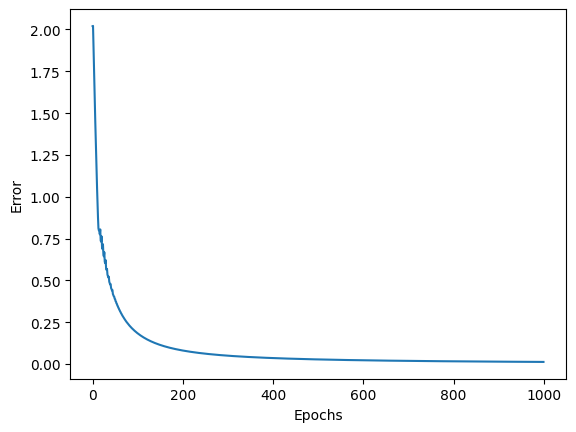

Testing the model:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])
Inputs (X): tensor([[ 1.,  1.,  2.],
        [ 1., -1.,  2.],
        [-1.,  1.,  2.],
        [-1., -1.,  2.],
        [ 5.,  5., 50.],
        [-5.,  5., 50.],
        [ 5., -5., 50.],
        [-5., -5., 50.]])

Weights: tensor([[-1.3988e-04,  8.2707e-05,  2.2041e-01]])

Bias: tensor([-4.1183])

Outputs after training: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [5]:
# 2. Neural Network with 3 inputs and 1 output

# Seed for reproducibility
torch.manual_seed(0)

# 2D Input Data (x1, x2) and corresponding Target values
X_2 = torch.tensor([[1, 1], [1, -1], [-1, 1], [-1, -1], [5, 5], [-5, 5], [5, -5], [-5, -5]], dtype=torch.float32)
y_2 = torch.tensor([[0], [0], [0], [0], [1], [1], [1], [1]], dtype=torch.float32)

# Transform 2D data into 3D by adding a third feature
X_3D = torch.cat([X_2, (X_2[:, 0]**2 + X_2[:, 1]**2).view(-1, 1)], dim=1)

print("Transformed 3D Data (x1, x2, x3):")
print(X_3D)
print("===========================================================")

# Create a class for the model
import torch.nn as nn
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc = nn.Linear(3, 1) 
        # Set initial weights and bias randomly between -2 and 2
        self.fc.weight.data = torch.empty(1, 3).uniform_(-2, 2)  
        self.fc.bias.data = torch.empty(1).uniform_(-2, 2)  

    def forward(self, x):
        return torch.sigmoid(self.fc(x)) 
    
# Initialize the model
neural_model = NeuralNet()
print(neural_model)

print("===========================================================")
# Print initial weights and bias
print("Initial weights: ", neural_model.fc.weight)
print("Initial bias: ", neural_model.fc.bias)
print("===========================================================")

# Loss and optimizer
loss_func = nn.BCELoss()
optimizer = optim.SGD(neural_model.parameters(), lr=0.1)

# Training loop
error_hist = []

for epoch in range(1000):
    # Forward pass
    y_pred = neural_model(X_3D)

    # Compute loss
    loss = loss_func(y_pred, y_2)
    error_hist.append(loss.item())

    # Zero gradients, backward pass, update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Plot the error
plt.plot(error_hist)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

print("===========================================================")
print("Testing the model:")
# Test the model
neural_model.eval()
with torch.no_grad():
    y_pred = neural_model(X_3D)

    y_pred = (y_pred > 0.5).float()
    print(y_pred)
    print(y)

print("===========================================================")
# Print the inputs, weights, bias, and outputs after training
print("Inputs (X):", X_3D)
print("\nWeights:", neural_model.fc.weight.data)
print("\nBias:", neural_model.fc.bias.data)
print("\nOutputs after training:", (y_pred > 0.5).float())

TwoLayerNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)
Initial weights for first layer:  Parameter containing:
tensor([[ 1.6608, -0.4116],
        [ 1.4966, -0.3224],
        [ 0.2116,  1.8110],
        [-1.8553, -1.2591],
        [-0.5063, -0.7796]], requires_grad=True)
Initial bias for first layer:  Parameter containing:
tensor([ 1.7280, -1.2964, -0.9207, -1.3973, -1.8731], requires_grad=True)
Initial weights for second layer:  Parameter containing:
tensor([[-1.1675,  1.7192,  0.8924,  0.9693,  0.1052]], requires_grad=True)
Initial bias for second layer:  Parameter containing:
tensor([-1.0254], requires_grad=True)
Epoch: 0, Loss: 0.5193169116973877
Epoch: 100, Loss: 0.37436360120773315
Epoch: 200, Loss: 0.26838481426239014
Epoch: 300, Loss: 0.19888919591903687
Epoch: 400, Loss: 0.15273115038871765
Epoch: 500, Loss: 0.12116576731204987
Epoch: 600, Loss: 0.09892278164625168
Epoch: 700, Loss: 0.08279000967741013

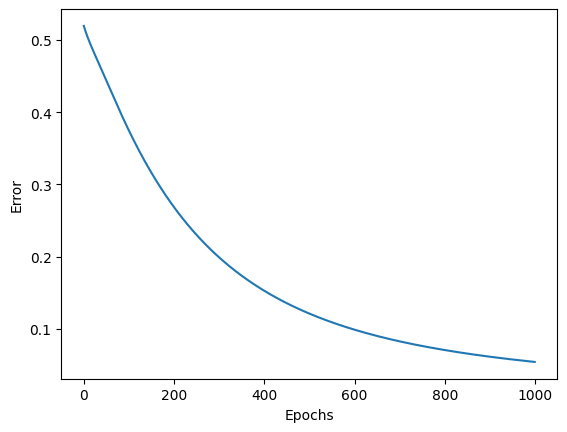

Testing the model:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])
Inputs (X): tensor([[ 1.,  1.],
        [ 1., -1.],
        [-1.,  1.],
        [-1., -1.],
        [ 5.,  5.],
        [-5.,  5.],
        [ 5., -5.],
        [-5., -5.]])

Weights for first layer: tensor([[ 1.2748, -0.0303],
        [ 1.3938, -0.0018],
        [ 0.0843,  1.1540],
        [-1.4759, -0.3532],
        [ 0.0613, -1.1778]])

Bias for first layer: tensor([ 3.1364, -3.2111, -2.2854, -2.5934, -2.6824])

Weights for second layer: tensor([[-3.2346,  4.7566,  2.4171,  2.0449,  2.5158]])

Bias for second layer: tensor([-1.0916])

Outputs after training: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [6]:
#3. Neural Network with 2 inputs, 5 nodes in the hidden layer, and 1 output

# Seed for reproducibility
torch.manual_seed(0)

# 2D Input Data (x1, x2) and corresponding Target values
X_3 = torch.tensor([[1, 1], [1, -1], [-1, 1], [-1, -1], [5, 5], [-5, 5], [5, -5], [-5, -5]], dtype=torch.float32)
y_3 = torch.tensor([[0], [0], [0], [0], [1], [1], [1], [1]], dtype=torch.float32)

class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(2, 5) 
        self.fc2 = nn.Linear(5, 1) 
        # Set initial weights and bias randomly between -2 and 2 for a layer with 5 nodes
        self.fc1.weight.data = torch.empty(5, 2).uniform_(-2, 2)  
        self.fc1.bias.data = torch.empty(5).uniform_(-2, 2)  
        self.fc2.weight.data = torch.empty(1, 5).uniform_(-2, 2)  
        self.fc2.bias.data = torch.empty(1).uniform_(-2, 2)    

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x)) 
        return torch.sigmoid(self.fc2(x))
    
# Initialize the model
two_layer_model = TwoLayerNet()
print(two_layer_model)

# Print initial weights and bias
print("===========================================================")
print("Initial weights for first layer: ", two_layer_model.fc1.weight)
print("Initial bias for first layer: ", two_layer_model.fc1.bias)
print("Initial weights for second layer: ", two_layer_model.fc2.weight)
print("Initial bias for second layer: ", two_layer_model.fc2.bias)
print("===========================================================")

# Loss and optimizer
loss_func = nn.BCELoss()
optimizer = optim.SGD(two_layer_model.parameters(), lr=0.1)


# Training loop
error_hist = []

for epoch in range(1000):
    # Forward pass
    y_pred = two_layer_model(X_3)

    # Compute loss
    loss = loss_func(y_pred, y_3)
    error_hist.append(loss.item())

    # Zero gradients, backward pass, update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')
    
# Plot the error
plt.plot(error_hist)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Test the model
print("===========================================================")
print("Testing the model:")
two_layer_model.eval()
with torch.no_grad():
    y_pred = two_layer_model(X_3)

    y_pred = (y_pred > 0.5).float()
    print(y_pred)
    print(y_3)
print("===========================================================")

# Print the inputs, weights, bias, and outputs after training
print("Inputs (X):", X_3)
print("\nWeights for first layer:", two_layer_model.fc1.weight.data)
print("\nBias for first layer:", two_layer_model.fc1.bias.data)
print("\nWeights for second layer:", two_layer_model.fc2.weight.data)
print("\nBias for second layer:", two_layer_model.fc2.bias.data)
print("\nOutputs after training:", (y_pred > 0.5).float())
